# Clustering

In [1]:
# @title
import datetime
print(datetime.datetime.now())

2025-02-17 00:23:38.053787


(Colab AI) Clustering in machine learning is the task of dividing a set of data points into a number of groups such that data points in the same group are more similar to other data points in the same group than those in other groups.

Clustering is a type of unsupervised learning, which means that there is no labeled training data. Instead, the algorithm must find the structure in the data on its own.

There are many different clustering algorithms, each with its own strengths and weaknesses. Some of the most common clustering algorithms include:

* K-means clustering
* Hierarchical clustering
* DBSCAN

## Data

#### Normalization and Standardization

* Z-Score Standardization
$Z = \frac{x-\mu}{\sigma} \sim N(0.0, 1.0)$

* Min-Max Normalization
$X' = \frac{X-X_{min}}{X_{max}-X_{min}} \in [0.0, 1.0]$

* Mean Normalization
$X' = \frac{X- \mu}{X_{max}-X_{min}} \in [-1.0, 1.0]$

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn import datasets
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


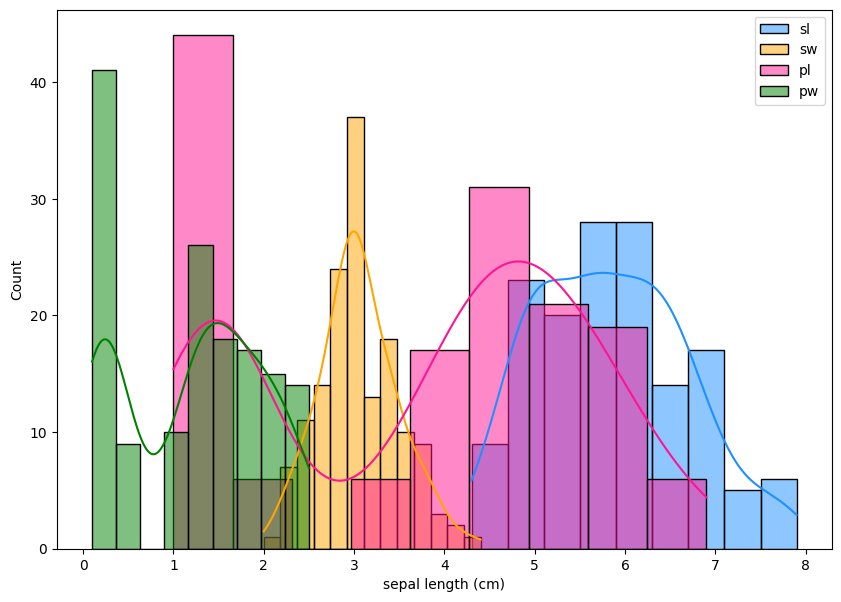

In [4]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.histplot(iris_df['sepal length (cm)'], color="dodgerblue", label="sl", kde=True)
sns.histplot(iris_df['sepal width (cm)'], color="orange", label="sw", kde=True)
sns.histplot(iris_df['petal length (cm)'], color="deeppink", label="pl", kde=True)
sns.histplot(iris_df['petal width (cm)'], color="green", label="pw", kde=True)
plt.legend()
plt.show()

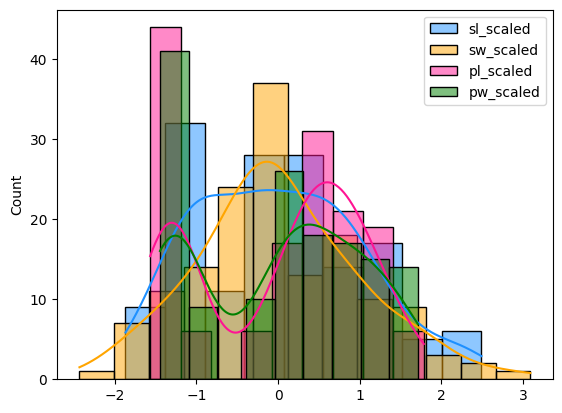

In [5]:
from sklearn import preprocessing
# you can try 'StandardScaler()', 'MinMaxScaler()', 'MaxAbsScaler()'
# 'Normalizer()', ...
# https://scikit-learn.org/stable/modules/preprocessing.html

sl_scaled = preprocessing.scale(iris_df['sepal length (cm)'], axis=0, with_mean=True, with_std=True, copy=True)
sw_scaled = preprocessing.scale(iris_df['sepal width (cm)'], axis=0, with_mean=True, with_std=True, copy=True)
pl_scaled = preprocessing.scale(iris_df['petal length (cm)'], axis=0, with_mean=True, with_std=True, copy=True)
pw_scaled = preprocessing.scale(iris_df['petal width (cm)'], axis=0, with_mean=True, with_std=True, copy=True)

sns.histplot(sl_scaled, color="dodgerblue", label="sl_scaled", kde=True)
sns.histplot(sw_scaled, color="orange", label="sw_scaled", kde=True)
sns.histplot(pl_scaled, color="deeppink", label="pl_scaled", kde=True)
sns.histplot(pw_scaled, color="green", label="pw_scaled", kde=True)
plt.legend()
plt.show()

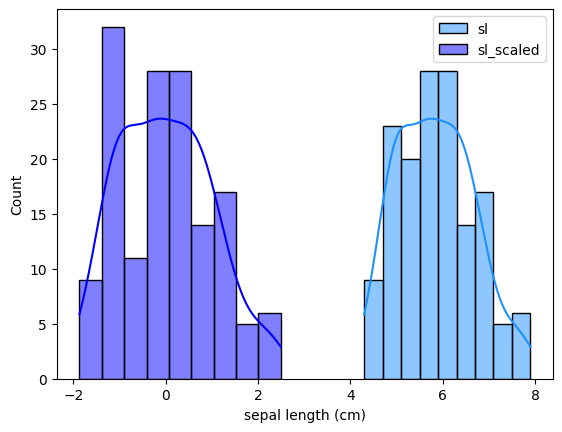

In [6]:
sns.histplot(iris_df['sepal length (cm)'], color="dodgerblue", label="sl", kde=True)
sns.histplot(sl_scaled, color="blue", label="sl_scaled", kde=True)
plt.legend()
plt.show()

In [7]:
# Descriptive Statistics

iris_df['sepal length (cm)'].describe()

,sepal length (cm)
count,150.000000
mean,5.843333
std,0.828066
min,4.300000
25%,5.100000
50%,5.800000
75%,6.400000
max,7.900000


## Scale


* Nominal Scale (名目尺度)
  * The nominal type differentiates between items or subjects based only on their names or (meta-)categories and other qualitative classifications they belong to.
  * 名目尺度下所衡量的數字僅是作為代碼, 數字大小不具任何意義, 也不能作數學運算。因此有意義的轉換方式必須是一對一的。

<!-- * Categorical Scale (類別尺度)
  * 類別尺度是將欲評估的資料依其特徵分類,再將每一個類別標示一個數字代碼。
-->

* Ordinal Scale (順序尺度)
  * The ordinal type allows for rank order (1st, 2nd, 3rd, etc.) by which data can be sorted, but still does not allow for relative degree of difference between them.
  * 所衡量的數字表示資料之間的大小關係。可以使用嚴格遞增函數轉換。

* Interval/Distance Scale (間距尺度)
  * The interval type allows for the degree of difference between items, but not the ratio between them. Examples include temperature scales with the Celsius scale.
  * 間距尺度所衡量的數字可以有意義地描述並比較數字之間的差距大小。可做線性轉換。

* Ratio Scale (比率尺度)
  * The ratio type takes its name from the fact that measurement is the estimation of the ratio between a magnitude of a continuous quantity and a unit of measurement of the same kind. Most measurement in the physical sciences and engineering is done on ratio scales.
  * 資料可以做倍率之間的比較。具有固定零點。

* Absolute Scale (絕對尺度)
  * It is simply a ratio scale in which the unit of measurement is fixed, and values are obtained by counting, e.g., probabilities, time.
  * 數字具有絕對的意義, 無法做其他有意義的轉換, 例如: 機率值。

## Distance


If we do not have a specific target to learn, what else we can do to find the 'hidden' relation between these data points?

What is the property of 'distance'?
* symmetric
* distance $\leftrightarrow$ similarity

If the range of distance is between 0.0 and 1.0, then the defition of similarity can be simply be (1 - distance).

#### Minkowski Distance

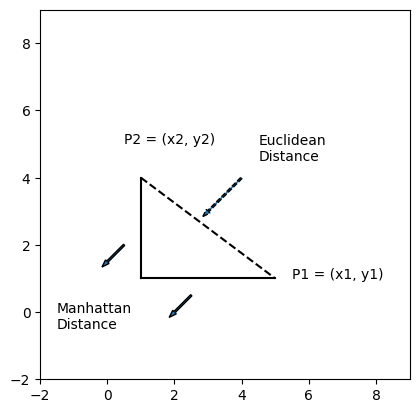

In [8]:
fig, ax = plt.subplots()
ax.set_aspect('equal', adjustable='box')
plt.plot([1, 1], [1, 4], 'k')# [x1, x2] [y1, y2]
plt.plot([1, 5], [1, 1], 'k')
plt.plot([1, 5], [4, 1], "k--")
plt.text(5.5, 1, 'P1 = (x1, y1)')
plt.text(0.5, 5, 'P2 = (x2, y2)')
plt.text(4.5, 4.5, 'Euclidean\nDistance')
plt.arrow(4, 4, -1, -1, width = 0.05, ls='--')
plt.text(-1.5, -0.5, 'Manhattan\nDistance')
plt.arrow(2.5, 0.5, -0.5, -0.5, width = 0.05)
plt.arrow(0.5, 2, -0.5, -0.5, width = 0.05)
plt.xlim(-2, 9)
plt.ylim(-2, 9)
plt.show()

Euclidean Distance $= (|x_1-x_2|^2 + |y_1-y_2|^2)^\frac{1}{2}$

Manhattan Distance $= |x_1-x_2| + |y_1-y_2|$


Minkowski distance $ = (\sum_{i=1}^{n} |x_i - y_i|^p )^\frac{1}{p}$

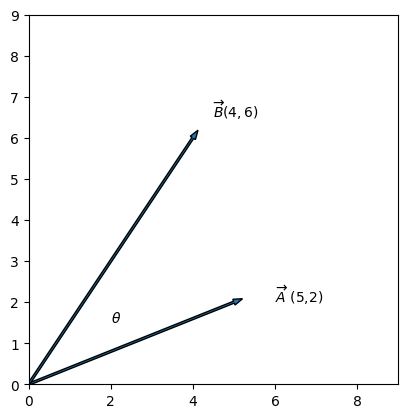

In [9]:
fig, ax = plt.subplots()
ax.set_aspect('equal', adjustable='box')
plt.text(2, 1.5, r'$\theta$')
plt.text(6, 2, r'$\overrightarrow{A}$ (5,2)')
plt.text(4.5, 6.5, r'$\overrightarrow{B} (4,6)$')
plt.arrow(0, 0, 5, 2, width = 0.05)
plt.arrow(0, 0, 4, 6, width = 0.05)
plt.xlim(0, 9)
plt.ylim(0, 9)
plt.show()

#### Cosine Similarity

Definition: $\overrightarrow{A} \cdot \overrightarrow{B} = ||A||*||B||*cos\theta$

Cosine similarity $ = cos\theta = \frac{\overrightarrow{A} \cdot \overrightarrow{B}}{||A||*||B||} = \frac{\sum_{i=1}^{n} A_i B_i}{\sqrt{\sum_{i=1}^{n} A^2} \sqrt{\sum_{i=1}^{n} B^2}}$

range = [-1.0, +1.0], how about 0.0?

In [10]:
from sklearn.metrics.pairwise import cosine_similarity
print('cosine_similarity:', cosine_similarity([[5,2]], [[4,6]]))
print('cosine_similarity:', cosine_similarity([[9,9]], [[9,9]]))
print('cosine_similarity:', cosine_similarity([[9,9]], [[1,1]]))
print('cosine_similarity:', cosine_similarity([[9,9]], [[-5,-5]]))
print('cosine_similarity:', cosine_similarity([[9,9]], [[+5,-5]]))

cosine_similarity: [[0.82404192]]
cosine_similarity: [[1.]]
cosine_similarity: [[1.]]
cosine_similarity: [[-1.]]
cosine_similarity: [[0.]]


#### Simple Matching Distance
https://en.wikipedia.org/wiki/Simple_matching_coefficient

For evaluating the distance of data points (e.g., $i$ and $j$) with only binary features (e.g., Gender, $F_2$, $F_3$, $\cdots$).

<table>
<tr><th>Name</th><th>Gender</th><th>$F_2$</th><th>$F_3$</th><th>$F_4$</th><th>$F_5$</th></tr>
<tr><td>Jack</td><td>M</td><td>True</td><td>N</td><td>postive</td><td>No</td></tr>
<tr><td>Jim</td><td>M</td><td>True</td><td>Y</td><td>negative</td><td>No</td></tr>
<tr><td>Marry</td><td>F</td><td>True</td><td>N</td><td>negative</td><td>No</td></tr>
</table>

<table>
<tr><td></td><td colspan = "3" align = "center">i</td></tr>
<tr><td rowspan ="3">j</td><td></td><td>0</td><td>1</td></tr>
<tr><td>0</td><td>a</td><td>b</td></tr>
<tr><td>1</td><td>c</td><td>d</td></tr>
</table>

$SMD(i,j) = d(i,j) = \frac{b+c}{a+b+c+d}$

simple matching coefficient (SMC) = 1 - SMD.


#### Jaccard Similarity
aka Jaccard index, Jaccard similarity coefficient

$J(A, B) = \frac{| A \cap B |}{| A \cup B|}$

Jacarrd Distance = $ = d_{J}(A,B) = 1 - J(A,B)$


#### Distance Matrix

We can further constuct a matrix to represent the distances between each pair of data points.

In [11]:
# Matrix of 5 vectors in 3 dimensions.
mx = np.random.random((5, 3))
mx

array([[0.21402846, 0.44913014, 0.69684306],
       [0.05661754, 0.94150062, 0.97332075],
       [0.9489278 , 0.85647318, 0.713666  ],
       [0.23364571, 0.19076872, 0.11140759],
       [0.10076041, 0.75243487, 0.40056638]])

In [12]:
# the distance matrix, it is symmetric!
from scipy.spatial import distance_matrix
distance_matrix(mx, mx)

array([[0.        , 0.58621396, 0.84040967, 0.64021102, 0.43886591],
       [0.58621396, 0.        , 0.93320301, 1.15664673, 0.60476609],
       [0.84040967, 0.93320301, 0.        , 1.14782669, 0.91007871],
       [0.64021102, 1.15664673, 1.14782669, 0.        , 0.64555416],
       [0.43886591, 0.60476609, 0.91007871, 0.64555416, 0.        ]])

## Idea of Clustering

We can plot all the data points in a space (and calculate the distance between each pair of them). It is quite straightforward to make clusers if they exist.

[Wiki] Cluster analysis or clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more **similar** (in some sense) to each other than to those in other groups (clusters).

Popular notions of clusters include groups with small distances between cluster members, dense areas of the data space, intervals or particular statistical distributions.

## Centroid-Based Clustering: K-means

http://nbviewer.jupyter.org/github/flothesof/posts/blob/master/20150717_Kmeans.ipynb

#### Centroid

In [13]:
# vstack(): Stack arrays in sequence vertically (row wise).
# Take a sequence of arrays and stack them vertically to make a single array.
points = np.vstack([np.random.randn(150, 2) * 0.75 + np.array([1, 0]),
                    np.random.randn(50, 2) * 0.25 + np.array([-0.5, 0.5]),
                    np.random.randn(50, 2) * 0.5 + np.array([-0.5, -0.5])])

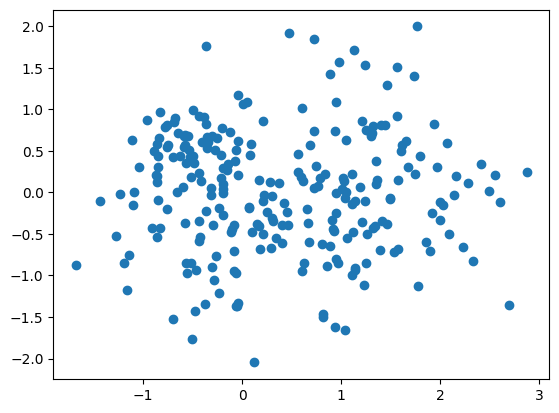

In [14]:
# Plot random generated data
# scatter(x, y)
plt.scatter(points[:, 0], points[:, 1])

# plot hidden centers
ax.set_aspect('equal', adjustable='box') # make the figure squared
ax.add_artist(plt.Circle(np.array([1, 0]), 0.75/2, fill=False, lw=2))
ax.add_artist(plt.Circle(np.array([-0.5, 0.5]), 0.25/2, fill=False, lw=2))
ax.add_artist(plt.Circle(np.array([-0.5, -0.5]), 0.5/2, fill=False, lw=2))

In [15]:
def initialize_centroids(points, k):
    """returns k centroids from the initial points"""
    centroids = points.copy()
    np.random.shuffle(centroids)
    return centroids[:k]

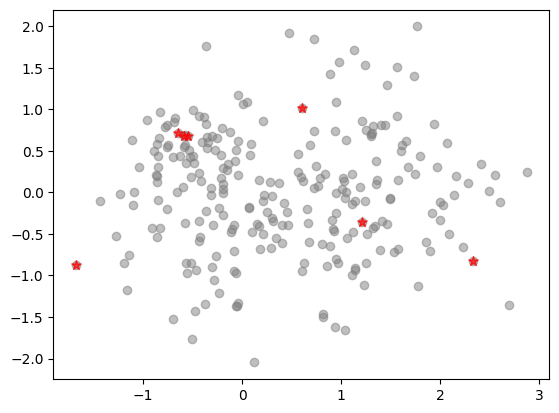

In [16]:
#### !!!!! We randomly select 7 centroids without any reasons
centroids = initialize_centroids(points, 7)

plt.scatter(points[:, 0], points[:, 1], c='grey', alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=50, marker='*', alpha=0.7)

# https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter

In [17]:
def closest_centroid(points, centroids):
    """returns an array containing the index to the nearest centroid for each point"""
    distances = np.sqrt(((points - centroids[:, np.newaxis])**2).sum(axis=2)) # broadcast
    return np.argmin(distances, axis=0) # Returns the indices of the minimum values along an axis.

# broadcast: it is a useful numpy 'syntactic sugar‘ to deal with array
# https://numpy.org/doc/stable/user/basics.broadcasting.html


In [18]:
# Try
cc = closest_centroid(points, centroids)
print(cc)

[2 2 2 2 3 2 2 2 5 3 2 2 2 5 2 3 2 1 3 6 2 2 5 5 3 2 6 2 2 3 2 2 5 2 2 2 5
 3 2 5 2 2 5 1 6 2 2 3 2 2 2 3 3 6 2 2 3 3 2 2 2 2 2 5 2 6 3 3 5 3 3 6 5 2
 3 2 5 2 2 2 2 3 2 5 2 2 3 3 6 3 2 3 2 6 2 2 0 3 3 3 2 2 2 2 2 2 2 3 3 2 5
 2 2 2 6 2 2 5 2 2 2 2 2 2 6 6 5 2 2 2 3 2 5 3 2 3 2 2 3 5 5 2 3 6 2 2 3 2
 2 3 1 6 6 6 6 6 1 6 6 0 0 6 0 0 6 6 1 6 6 1 6 0 3 6 6 0 6 6 1 6 1 6 0 1 6
 0 6 0 6 6 1 0 1 0 6 6 0 0 6 0 2 1 4 6 4 6 0 2 1 6 6 4 4 2 4 1 1 4 6 4 4 4
 4 1 4 6 4 4 4 4 2 4 4 4 6 6 2 4 6 4 4 0 2 4 2 0 6 1 6 6]


In [19]:
def move_centroids(points, closest, centroids):
    """returns the new centroids assigned from the points closest to them"""
    return np.array([points[closest==k].mean(axis=0) for k in range(centroids.shape[0])])

In [20]:
new_centroids = move_centroids(points, closest_centroid(points, centroids), centroids)
print(new_centroids)

[[-0.80700776  0.71483948]
 [-0.7165264   0.23145543]
 [ 0.89241561 -0.38977103]
 [ 0.96380238  0.97963842]
 [-0.76449291 -0.88429687]
 [ 2.23050153 -0.2966534 ]
 [-0.24051305  0.23455061]]


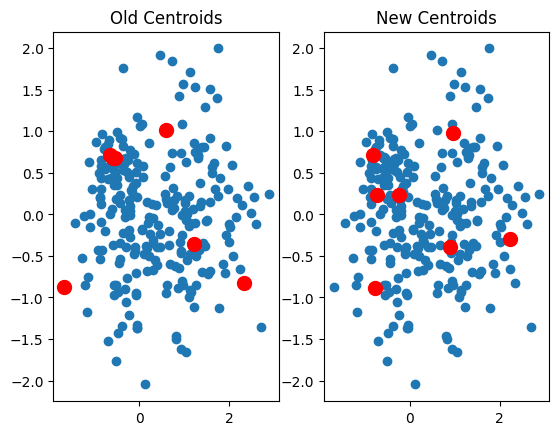

In [21]:
ax = plt.subplot(121)
ax.set_title("Old Centroids")
plt.scatter(points[:, 0], points[:, 1])
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)

ax = plt.subplot(122)
ax.set_title("New Centroids")
plt.scatter(points[:, 0], points[:, 1])
plt.scatter(new_centroids[:, 0], new_centroids[:, 1], c='r', s=100)

#### Iteration

First, ramdon choose data points as centroids.

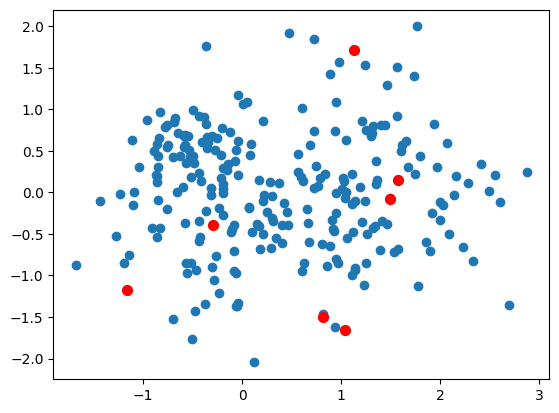

In [22]:
# init
plt.scatter(points[:, 0], points[:, 1])
centroids = initialize_centroids(points, 7)
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=50)

Then, make clusters by using the distance of nearest centroid.

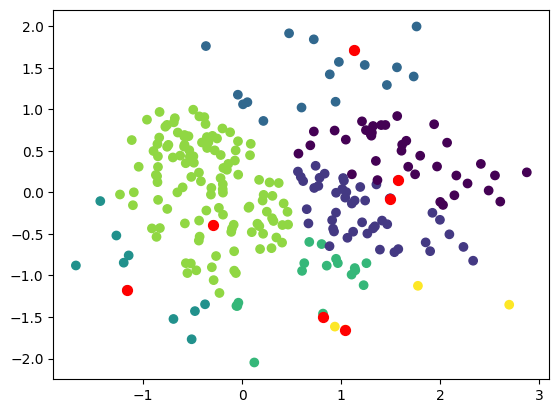

In [23]:
closest = closest_centroid(points, centroids)
plt.scatter(points[:, 0], points[:, 1], c=closest)
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=50)

Remove centroids. Using the current cluster to choose new (virtual) centroids.

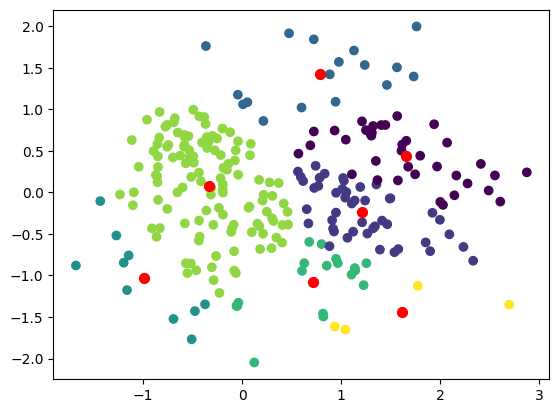

In [24]:
# run this block multiple times to get 'better' centroids

centroids = move_centroids(points, closest, centroids)
plt.scatter(points[:, 0], points[:, 1], c=closest)
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=50)

#### Animation


In [25]:
import ipywidgets
# jupyter nbextension enable --py --sys-prefix widgetsnbextension

In [26]:
# init
centroids = initialize_centroids(points, 7)
print(centroids)

[[-0.35257527  0.53454872]
 [-0.96022274  0.87504839]
 [-0.85811598  0.19495189]
 [ 1.39266874 -0.68904381]
 [-0.19413897  0.09821432]
 [-0.42837196 -0.53247043]
 [ 0.59334102  0.18659214]]


In [27]:
# iter
def f(x):
    global points, centroids, closest

    if x == 0: # print init points and random-selected starting points
        plt.scatter(points[:, 0], points[:, 1])
        plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=50)
        plt.show()
        print("print init points and random-selected starting points")
    elif x % 4 == 1: # color the points by the closest centroids
        closest = closest_centroid(points, centroids)
        plt.scatter(points[:, 0], points[:, 1], c=closest)
        plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=50)
        plt.show()
        print("color the points by the closest centroids")
    elif x % 4 == 2: # show the color points only
        plt.scatter(points[:, 0], points[:, 1], c=closest)
        plt.show()
        print("show the color points only")
    elif x % 4 == 3: # find the new centroids
        centroids = move_centroids(points, closest, centroids)
        plt.scatter(points[:, 0], points[:, 1], c=closest)
        plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=50)
        plt.show()
        print("find the new centroids")
    else:
        plt.scatter(points[:, 0], points[:, 1])
        plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=50)
        plt.show()
        print("remove old cluster")

In [28]:
# http://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html

ipywidgets.interact(f, x = ipywidgets.FloatSlider(min = 0.0, max = 50.0, step = 1.0, value = 0.0))

interactive(children=(FloatSlider(value=0.0, description='x', max=50.0, step=1.0), Output()), _dom_classes=('w…

<function __main__.f(x)>

#### Discussion (K-means)
* K-means clustering needs the number of clusters to be speciﬁed.
* K-means assume that clusters have similar density.
* K-means is sensitive to outliers; K-means is sensitive to initial points and local optimal.
* K-means is linear in the number of data objects i.e., $O(n)$, where $n$ is the number of data objects. The time complexity of most of the hierarchical clustering algorithms is quadratic i.e., $O(n^2)$.
* K-means works well when the shape of clusters are hyper-spherical (or circular in 2 dimensions). If the natural clusters occurring in the dataset are non-spherical then probably K-means is not a good choice.
* K-means starts with a random choice of cluster centers, therefore it may yield different clustering results on different runs of the algorithm. Thus, the results may not be repeatable and lack consistency. However, with hierarchical clustering, you will most definitely get the same clustering results.
* How the choose $K$?

#### How to choose K?

calculate avgWithinSS

In [29]:
import numpy as np
from scipy.cluster.vq import kmeans,vq
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

X = points

##### cluster data into K=1..9 clusters #####
K = range(1,10)

# scipy.cluster.vq.kmeans
KM = [kmeans(X,k) for k in K]
centroids = [c for (c,var) in KM]   # cluster centroids
avgWithinSS = [var for (cent,var) in KM] # avg within-cluster squared error

# alternative: scipy.spatial.distance.cdist
# Compute distance between each pair of the two collections of inputs.
D_k = [cdist(X, c, 'euclidean') for c in centroids]
cIdx = [np.argmin(D,axis=1) for D in D_k]
dist = [np.min(D,axis=1) for D in D_k]
#avgWithinSS = [sum(d)/X.shape[0] for d in dist]

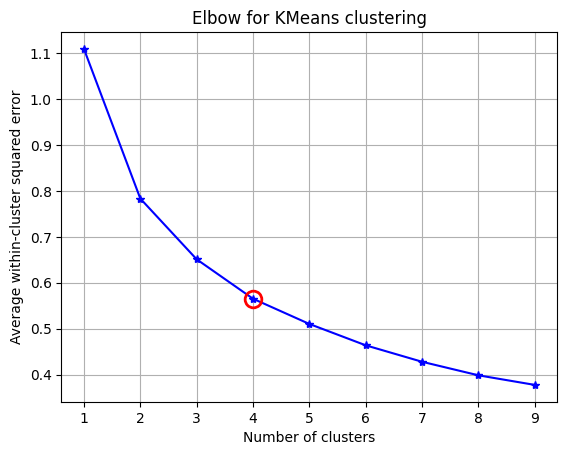

In [30]:
##### plot ###
k = 4
kIdx = k-1 # <----- you can change k

# elbow curve
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, avgWithinSS, 'b*-')
ax.plot(K[kIdx], avgWithinSS[kIdx], marker='o', markersize=12,
    markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Average within-cluster squared error')
plt.title('Elbow for KMeans clustering')
plt.show()

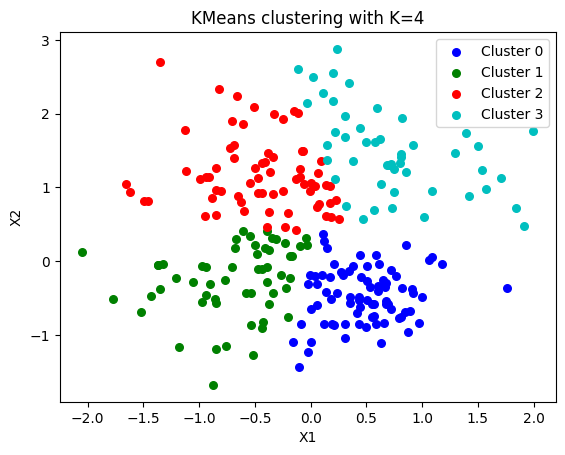

In [31]:
# scatter plot
fig = plt.figure()
ax = fig.add_subplot(111)
#ax.scatter(X[:,2],X[:,1], s=30, c=cIdx[k])
clr = ['b','g','r','c','m','y','k']
for i in range(K[kIdx]):
    ind = (cIdx[kIdx]==i)
    ax.scatter(X[ind,1],X[ind,0], s=30, c=clr[i], label='Cluster %d'%i)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('KMeans clustering with K=%d' % K[kIdx])
plt.legend()
plt.show()

#### What else?

* K-menas: the center of a cluster is not necessarily one of the input data points (it is the average between the points in the cluster).
* K-mode: can deal with **categorial data**; need a distance funtion for data points with categorial features.
* K-mediods: k-medoids chooses **actual data points** as centers (medoids or exemplars), and thereby allows for greater interpretability of the cluster centers than in k-means.

#### What is K-NN?

k-Nearest Neighbors (a supervised learning for classificaion)

http://machinelearningmastery.com/tutorial-to-implement-k-nearest-neighbors-in-python-from-scratch/


k-NN is a supervised learning, but it highly depends on the concpet of 'distance' (so I put this algorithm here).

The model for kNN is the entire training dataset. When a prediction is required for a unseen data instance, the kNN algorithm will search through the training dataset for **the k-most similar instances**. The prediction attribute of the most similar instances is summarized and returned as the prediction for the unseen instance.

The **similarity measure** is dependent on the type of data. For real-valued data, the Euclidean distance can be used. Other other types of data such as categorical or binary data, Hamming distance can be used.

In the case of **regression** problems, the average of the predicted attribute may be returned. In the case of **classification**, the most prevalent class may be returned.

In [32]:
import numpy as np
from sklearn import datasets

iris = datasets.load_iris()
iris_X = iris.data
iris_y = iris.target
np.unique(iris_y)

array([0, 1, 2])

In [33]:
np.random.seed(0)
indices = np.random.permutation(len(iris_X))
iris_X_train = iris_X[indices[:-10]]
iris_y_train = iris_y[indices[:-10]]
iris_X_test  = iris_X[indices[-10:]]
iris_y_test  = iris_y[indices[-10:]]

print(len(iris_X_train), len(iris_X_test))

140 10


In [34]:
# Create and fit a nearest-neighbor classifier
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(iris_X_train, iris_y_train)
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=1, n_neighbors=5, p=2,
                     weights='uniform')

KNeighborsClassifier(n_jobs=1)

In [35]:
print(iris_X_test)

print(knn.predict(iris_X_test))

[[5.6 3.  4.1 1.3]
 [5.9 3.2 4.8 1.8]
 [6.3 2.3 4.4 1.3]
 [5.5 3.5 1.3 0.2]
 [5.1 3.7 1.5 0.4]
 [4.9 3.1 1.5 0.1]
 [6.3 2.9 5.6 1.8]
 [5.8 2.7 4.1 1. ]
 [7.7 3.8 6.7 2.2]
 [4.6 3.2 1.4 0.2]]
[1 2 1 0 0 0 2 1 2 0]


Question: what is the problem of distance based algorithm?

## Hierarchical Clustering

Unweighted Pair Group Method with Arithmetic Mean

UPGMA is a simple bottom-up hierarchical clustering method. UPGMA is as known as Phylogenetic tree. Take a look: http://www.slimsuite.unsw.edu.au/teaching/upgma/

You MUST read the above example. It is part of our teaching material.

### Linkage Implementation (average)

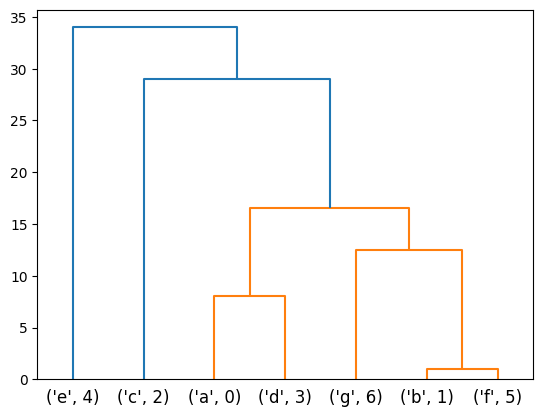

In [36]:
import scipy
import scipy.cluster.hierarchy as sch
import matplotlib.pylab as plt

# distance matrix
matr = [[0, 19, 27, 8, 33, 18, 13],
        [19, 0, 31, 18, 36, 1, 13],
        [27, 31, 0, 26, 41, 32, 29],
        [8, 18, 26, 0, 31, 17, 14],
        [33, 36, 41, 31, 0, 35, 28],
        [18, 1, 32, 17, 35, 0, 12],
        [13, 13, 29, 14, 28, 12, 0]
        ]

L = list(zip(map(chr, range(97, 97 + len(matr))), range(len(matr))))

D = scipy.spatial.distance.squareform(matr) # get half tiangle distance
Z = sch.linkage(D, method='average') # calculate cluster and height
P = sch.dendrogram(Z, labels=L) # plot

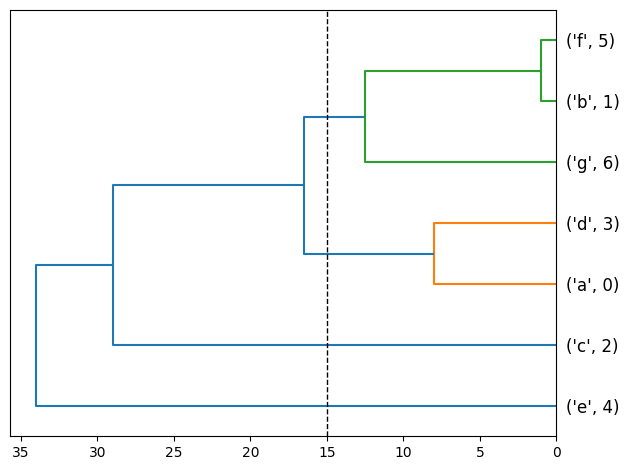

In [37]:
upgma_threshold = 15

sch.dendrogram(Z, labels=L, color_threshold=upgma_threshold, orientation = 'left')
plt.axvline(x=upgma_threshold, linewidth=1, color='black', linestyle='--')

plt.tight_layout()
plt.show()
#plt.savefig('upgma.pdf', dpi=300) # pdf, png

#### Binary Distance w/ Jaccard

In [38]:
# an array of 4 points in five-dimensional space
# 1 means
b = [[1, 1, 1, 1, 1],
     [0, 1, 0, 1, 0],
     [0, 1, 1, 0, 1],
     [0, 1, 1, 1, 0],
]

# Pairwise distances between observations in n-dimensional space.
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html
d = sch.distance.pdist(b, 'jaccard') # Try different distance methods

# 6 pairwise Jaccard distances (in half trangle style)
print(d)

[0.6        0.4        0.4        0.75       0.33333333 0.5       ]


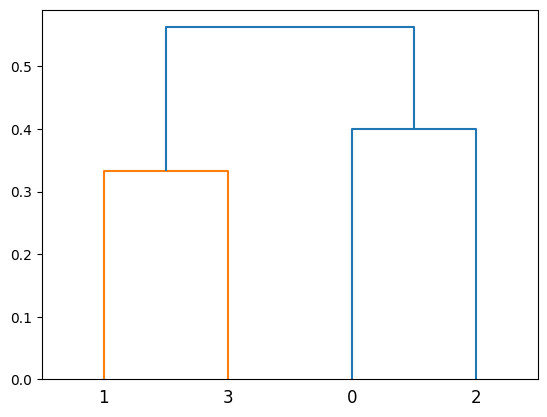

In [39]:
z = sch.linkage(d, method='average')
p = sch.dendrogram(z)
plt.show()

## Density-Based Clustering: DBSCAN

The DBSCAN algorithm views clusters as areas of high density separated by areas of low density. Due to this rather generic view, clusters found by DBSCAN can be any shape, as opposed to k-means which assumes that clusters are convex shaped. The central component to the DBSCAN is the concept of core samples, which are samples that are in areas of high density.

https://www.youtube.com/watch?v=RDZUdRSDOok


#### DBSCAN (sklearn)

In [40]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [41]:
# #############################################################################
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=0.4, random_state=0
)

X = StandardScaler().fit_transform(X)

In [42]:
# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

In [43]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(labels_true, labels))
print(
    "Adjusted Mutual Information: %0.3f"
    % metrics.adjusted_mutual_info_score(labels_true, labels)
)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))

Estimated number of clusters: 3
Estimated number of noise points: 18
Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.916
Silhouette Coefficient: 0.626


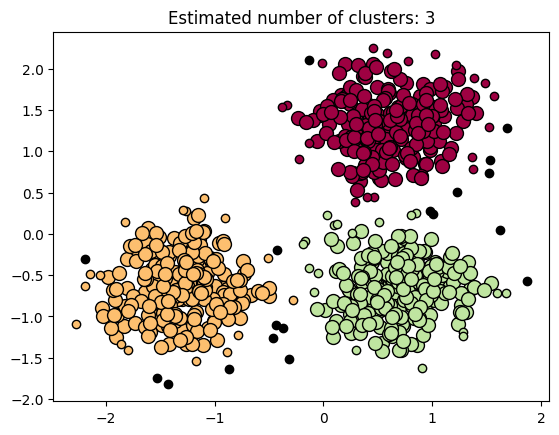

In [44]:
# #############################################################################
# Plot result

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=10,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

#### K-MEANS (sklearn)

In [45]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0, n_init = 'auto').fit(X)
print(kmeans.labels_)
print(kmeans.cluster_centers_)

[0 1 0 2 0 1 1 2 0 0 1 1 1 2 1 0 1 1 1 2 2 2 2 2 1 1 2 0 0 2 0 1 1 0 1 0 2
 0 0 2 2 1 1 1 1 1 0 2 0 1 2 2 1 1 2 2 1 0 2 1 2 2 2 2 2 0 2 2 0 0 0 2 0 0
 2 1 0 1 0 2 1 1 0 0 0 0 1 2 1 2 2 0 1 0 1 0 1 1 0 0 2 1 2 0 2 2 2 2 0 0 0
 1 1 1 1 0 0 1 0 1 2 1 0 0 1 2 1 0 0 2 0 2 2 2 0 1 2 2 0 1 0 2 0 0 2 2 1 2
 1 0 2 1 1 2 2 2 0 1 0 1 0 1 0 2 2 1 1 2 2 1 0 1 2 2 2 1 1 2 2 0 1 2 0 0 2
 0 0 1 0 1 0 1 1 2 2 0 0 1 1 2 1 2 2 2 2 0 2 0 2 2 0 2 2 2 0 0 1 1 1 2 2 2
 2 1 2 2 0 0 2 0 0 0 1 0 1 1 1 2 1 1 0 1 2 2 1 2 2 1 0 0 1 1 1 0 1 0 2 0 2
 2 2 2 2 1 1 0 0 1 1 0 0 2 1 2 2 1 1 2 1 2 0 2 2 0 1 2 2 0 2 2 0 0 2 0 2 0
 2 1 0 0 0 1 2 1 2 2 0 2 2 0 0 2 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 0 2 0 1 2 2
 0 0 2 0 2 1 0 2 0 2 0 2 2 0 1 0 1 0 2 2 1 1 1 2 0 2 0 2 1 2 2 0 1 0 1 0 0
 0 0 2 0 2 0 1 0 1 2 1 1 1 0 1 1 0 2 1 0 2 2 1 1 2 2 2 1 2 1 2 0 2 1 2 1 0
 1 0 1 1 0 1 2 2 1 0 0 2 1 2 2 2 2 1 0 0 0 0 1 0 2 1 0 1 2 0 0 1 0 1 1 0 1
 0 2 2 2 1 1 2 0 1 0 0 1 0 1 1 2 2 1 0 1 2 2 1 1 1 1 0 0 0 2 2 1 2 1 0 0 1
 2 1 0 0 2 0 1 0 2 1 0 2 

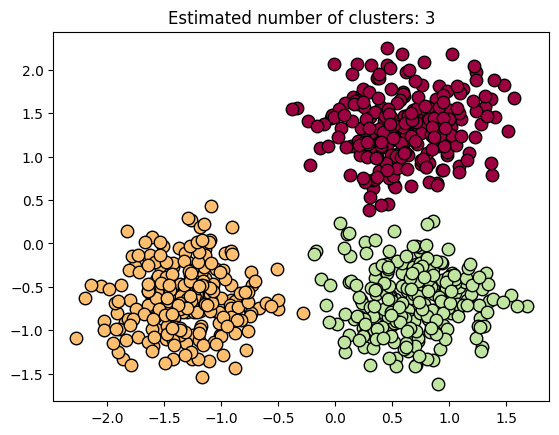

In [46]:
k_unique_labels = set(kmeans.labels_)
k_colors = colors
for k, col in zip(k_unique_labels, k_colors):

    class_member_mask = labels == k

    xy = X[class_member_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=9,
    )

plt.title("Estimated number of clusters: %d" % len(k_unique_labels))
plt.show()

# Dataset: Malware Calls

https://github.com/hsiaom26/DS4CS-24/raw/main/data/F14S1940_callonly_tfds.zip

## Data Table

In [47]:
# get data from github

import requests

url = 'https://github.com/hsiaom26/DS4CS-24/raw/main/data/F14S1940_callonly_tfds.zip'

response = requests.get(url)

if response.status_code == 200:
    # Open the file for writing
    with open('F14S1940_callonly_tfds.zip', 'wb') as f:
        # Write the response content to the file
        f.write(response.content)
else:
    print('Error: Failed to download the file')

In [48]:
!unzip -q F14S1940_callonly_tfds.zip

In [49]:
!ls -al F14S1940_callonly_tfds

total 104
drwxr-xr-x 16 root root  4096 Feb 21  2024 .
drwxr-xr-x  1 root root  4096 Feb 17 00:24 ..
drwxr-xr-x  2 root root 20480 Jun  6  2022 allaple_woj_g_98_year2017
drwxr-xr-x  2 root root  4096 Jun  6  2022 bettersurf_woj_g_137+
drwxr-xr-x  2 root root  4096 Jun  6  2022 elkern_woj_g_127
drwxr-xr-x  2 root root 12288 Jun  6  2022 graftor_g_18
drwxr-xr-x  2 root root  4096 Jun  6  2022 hotbar_g_32
drwxr-xr-x  2 root root  4096 Jun  6  2022 kryptik_g_529
drwxr-xr-x  2 root root  4096 Jun  6  2022 kryptik_g_547
drwxr-xr-x  2 root root 12288 Jun  6  2022 loadmoney_g_183
drwxr-xr-x  2 root root  4096 Jun  6  2022 loring_g_15
drwxr-xr-x  2 root root  4096 Jun  6  2022 mydoom_g_13
drwxr-xr-x  2 root root  4096 Jun  6  2022 rahack_g_39
drwxr-xr-x  2 root root 12288 Jun  6  2022 sytro_woj_g_166
drwxr-xr-x  2 root root  4096 Jun  6  2022 vobfus_g_111
drwxr-xr-x  2 root root  4096 Jun  6  2022 zbot_g_37


The folder name is the malware family name.

In [50]:
# count number of files in a directory for each sub-directory in python

import os

def count_files_in_subdirectories(directory):
  """
  Counts the number of files in each sub-directory of a given directory.

  Args:
    directory: The path to the directory.

  Returns:
    A dictionary where the keys are the sub-directory names and the values are the file counts.
  """

  file_counts = {}
  for subdir in os.listdir(directory):
    sub_dir_path = os.path.join(directory, subdir)
    if os.path.isdir(sub_dir_path):
      file_counts[subdir] = len(os.listdir(sub_dir_path))

  return file_counts

# Example usage
directory = "/content/F14S1940_callonly_tfds"
file_counts = count_files_in_subdirectories(directory)

# Print the results
for subdir, count in file_counts.items():
  print(f"{subdir}: {count}")

elkern_woj_g_127: 111
loadmoney_g_183: 277
sytro_woj_g_166: 312
allaple_woj_g_98_year2017: 615
kryptik_g_547: 82
kryptik_g_529: 43
zbot_g_37: 52
graftor_g_18: 244
rahack_g_39: 49
hotbar_g_32: 22
vobfus_g_111: 58
bettersurf_woj_g_137+: 55
mydoom_g_13: 10
loring_g_15: 10


When a malweare was executing, we recored the windows API calls it invoked. Here is an example.

In [51]:
!head -20 /content/F14S1940_callonly_tfds/loadmoney_g_183/0006df-3156.txt

LoadLibrary LoadLibrary LoadLibrary LoadLibrary LoadLibrary LoadLibrary LoadLibrary RegQueryValue RegQueryValue LoadLibrary CreateFile RegQueryValue RegQueryValue RegEnumValue RegCreateKey LoadLibrary LoadLibrary LoadLibrary LoadLibrary LoadLibrary RegQueryValue LoadLibrary LoadLibrary LoadLibrary LoadLibrary RegQueryValue RegQueryValue RegQueryValue RegQueryValue InternetOpen RegQueryValue RegQueryValue RegQueryValue RegQueryValue RegQueryValue RegQueryValue RegQueryValue RegQueryValue RegQueryValue LoadLibrary RegQueryValue RegQueryValue RegQueryValue RegQueryValue RegQueryValue RegQueryValue RegQueryValue RegQueryValue RegQueryValue RegQueryValue LoadLibrary RegCreateKey RegQueryValue RegCreateKey RegSetValue RegQueryValue RegQueryValue RegSetValue RegSetValue RegSetValue RegSetValue RegSetValue RegSetValue RegSetValue RegSetValue RegSetValue RegSetValue RegQueryValue RegQueryValue RegCreateKey RegQueryValue RegCreateKey RegSetValue RegQueryValue RegQueryValue RegQueryValue RegQuery

Lets make a dictionary that store the counts of each API call of a malware.

In [52]:
def count_api_calls(malware_text_file):
  aip_dict = dict()
  with open(malware_text_file, 'r') as file:
    call_seq = file.readline() # note: only one line in .txt file
    calls = call_seq.split()
    for call in calls:
      if call in aip_dict:
        aip_dict[call] += 1
      else:
        aip_dict[call] = 1
    return aip_dict

In [53]:
malware_text_file = "/content/F14S1940_callonly_tfds/loadmoney_g_183/0006df-3156.txt"
count_api_calls(malware_text_file)

{'LoadLibrary': 42,
 'RegQueryValue': 340,
 'CreateFile': 23,
 'RegEnumValue': 92,
 'RegCreateKey': 24,
 'InternetOpen': 1,
 'RegSetValue': 25,
 'InternetConnect': 1,
 'HttpSendRequest': 1,
 'RegDeleteKey': 3}

In [54]:
malware_text_file = "/content/F14S1940_callonly_tfds/hotbar_g_32/0b1e21-3388.txt"
count_api_calls(malware_text_file)

{'LoadLibrary': 36,
 'CreateFile': 82,
 'RegQueryValue': 216,
 'RegEnumValue': 63,
 'RegCreateKey': 8,
 'RegSetValue': 1,
 'CreateThread': 6}

Read all .txt files into a dictionary. But for the convenient, we only select 10 samples in each sub-directory.

In [55]:
import os

# Only select the first few samples!
sample_size = 5

# A dictionary to collect all count_api_calls() return
malware_call_dict = dict()

# Define the root directory to walk through
root_dir = "/content/F14S1940_callonly_tfds/"

# Walk through the directory and its subdirectories
for dir_name, subdir_list, file_list in os.walk(root_dir):

    # Read all .txt files in the current directory
    for file_name in file_list[:sample_size]: # !!!!! only select the first few samples!
        if file_name.endswith(".txt"):
            # Read the file contents
            subdir = dir_name.split('/')[-1]
            malware_call_dict[subdir+'/'+file_name] = count_api_calls(os.path.join(dir_name, file_name))

In [56]:
import pandas as pd

# Convert the dictionary to a DataFrame
malware_call_df = pd.DataFrame.from_dict(malware_call_dict, orient='index')
malware_call_df

,LoadLibrary,RegQueryValue,CreateFile,CopyFile,RegCreateKey,RegSetValue,CreateThread,ExitProcess,RegEnumValue,InternetOpen,...,HttpSendRequest,RegDeleteKey,CreateProcessInternal,CreateProcess,DeleteFile,OpenProcess,WinHttpOpen,WinHttpConnect,WinHttpOpenRequest,WinHttpSendRequest
elkern_woj_g_127/edd1c9-3380.txt,21,23,186,52.0,7.0,6.0,2.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
elkern_woj_g_127/b35829-3368.txt,21,23,188,52.0,8.0,7.0,2.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
elkern_woj_g_127/9caef5-3332.txt,21,23,196,52.0,11.0,10.0,2.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
elkern_woj_g_127/49909c-2892.txt,21,23,188,52.0,8.0,7.0,2.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
elkern_woj_g_127/d40bd4-3308.txt,21,23,184,52.0,6.0,5.0,2.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
loring_g_15/1d1e01-3268.txt,5,2,338,335.0,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loring_g_15/0d016f-3200.txt,5,2,324,321.0,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loring_g_15/0c5dec-3340.txt,6,3,1228,408.0,NaN,1.0,NaN,1.0,NaN,NaN,...,NaN,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
loring_g_15/1cdb08-3232.txt,5,2,392,390.0,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
malware_call_df.fillna(0, inplace=True)

In [58]:
malware_binary_call_df = malware_call_df.applymap(lambda x: 1 if x > 0 else 0)

<ipython-input-58-2b342153cd27>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  malware_binary_call_df = malware_call_df.applymap(lambda x: 1 if x > 0 else 0)


## Clustering (UPGMA)

In [59]:
import scipy
import scipy.cluster.hierarchy as sch
import matplotlib.pylab as plt

from scipy.spatial.distance import squareform, pdist

In [60]:
# use dataframe to create a distance matrix
d = pdist(malware_call_df)
d.shape

(2415,)

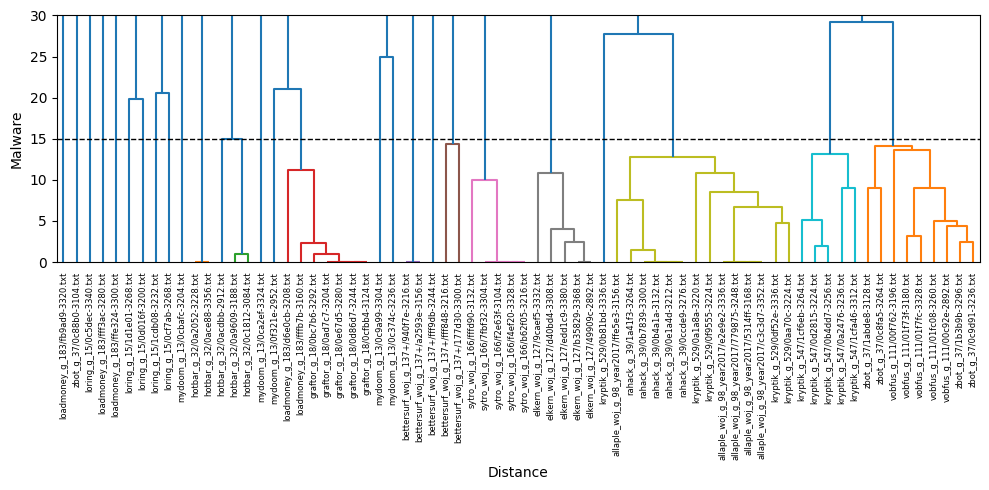

In [61]:
upgma_threshold = 15
plt.figure(figsize=(10, 5))

Z = sch.linkage(d, method='average')
P = sch.dendrogram(Z, labels=malware_call_df.index, color_threshold=upgma_threshold)
plt.axhline(y=upgma_threshold, linewidth=1, color='black', linestyle='--')

plt.xlabel('Distance')
plt.ylabel('Malware')
plt.ylim([0, 30])
plt.tight_layout()
plt.show()

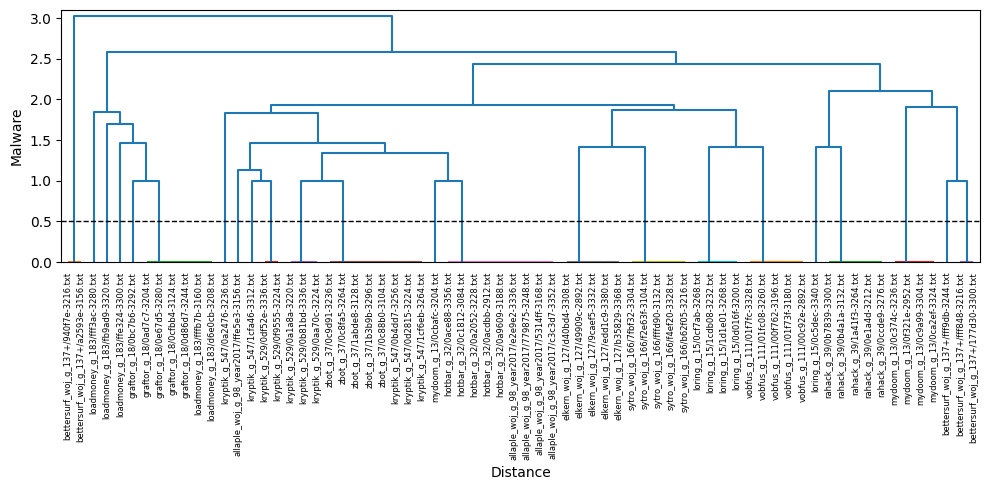

In [62]:
# use binary features
bd = pdist(malware_binary_call_df)
upgma_threshold = 0.5
plt.figure(figsize=(10, 5))

Z = sch.linkage(bd, method='average')
P = sch.dendrogram(Z, labels=malware_call_df.index, color_threshold=upgma_threshold)
plt.axhline(y=upgma_threshold, linewidth=1, color='black', linestyle='--')

plt.xlabel('Distance')
plt.ylabel('Malware')
plt.ylim([0, 3.1])
plt.tight_layout()
plt.show()

### Cluster (K-Means)

In [63]:
from sklearn.cluster import KMeans

X = malware_call_df.values

kmeans = KMeans(n_clusters=14, random_state=0, n_init = 'auto').fit(X)

In [64]:
class_label = pd.Series(malware_call_df.index).apply(lambda l: l.split('/')[0])
class_label

,0
0,elkern_woj_g_127
1,elkern_woj_g_127
2,elkern_woj_g_127
3,elkern_woj_g_127
4,elkern_woj_g_127
...,...
65,loring_g_15
66,loring_g_15
67,loring_g_15
68,loring_g_15


In [65]:
kmeans.labels_

array([ 4,  4,  4,  4,  4,  0,  7, 11,  0,  6,  4,  4,  4,  4,  4,  1,  1,
        1,  1,  1, 10, 10, 10, 10, 10,  1,  1,  1,  1,  1,  3, 10, 10, 10,
       10,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  8,  8,  8,  8,  8, 10,
       10, 10, 10, 10,  9, 13, 13,  9,  9,  0,  8,  0,  0,  0, 12, 12,  5,
        2,  2], dtype=int32)

In [66]:
compare_df = pd.DataFrame({'class_label': class_label, 'cluster_label': kmeans.labels_})
compare_df

,class_label,cluster_label
0,elkern_woj_g_127,4
1,elkern_woj_g_127,4
2,elkern_woj_g_127,4
3,elkern_woj_g_127,4
4,elkern_woj_g_127,4
...,...,...
65,loring_g_15,12
66,loring_g_15,12
67,loring_g_15,5
68,loring_g_15,2
